### Covariate Shift

- Distributions can change over time

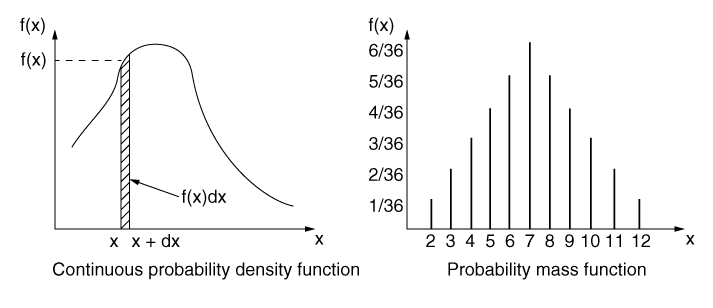

### Label Shift

Predict diagnoses given their symptoms can become predict symptoms given disease

$P(y \mid \mathbf{x})$ becomes $P(\mathbf{x} \mid y)$

### Concept Shift

Favourite beverages can be different for different locations. Essentially distributions, $P(y \mid \mathbf{x})$ can be different for different locations.

### Correction of Distribution Shift

- Empirical Risk and Risk: The empirical risk is an average loss over the training data. Risk is average loss over the entire population. 
- Since we know how to optimize the loss, $\mathop{\mathrm{minimize}}_f \frac{1}{n} \sum_{i=1}^n l(f(\mathbf{x}_i), y_i)$, we can calculate empirical risk as $E_{p(\mathbf{x}, y)} [l(f(\mathbf{x}), y)] = \int\int l(f(\mathbf{x}), y) p(\mathbf{x}, y) \;d\mathbf{x}dy$.

### Covariate Shift Correction

- If our data has been drawn from source-distribution $\large Q(y \mid \mathbf{x})$, instead of target-distribution $P(y \mid \mathbf{x})$, following dependency assumption, $p(y \mid \mathbf{x}) = q(y \mid \mathbf{x})$, so $\begin{aligned}
\int\int l(f(\mathbf{x}), y) p(y \mid \mathbf{x})p(\mathbf{x}) \;d\mathbf{x}dy =
\int\int l(f(\mathbf{x}), y) q(y \mid \mathbf{x})q(\mathbf{x})\frac{p(\mathbf{x})}{q(\mathbf{x})} \;d\mathbf{x}dy
\end{aligned}$ and we can find $\large \beta_i \stackrel{\mathrm{def}}{=} \frac{p(\mathbf{x}_i)}{q(\mathbf{x}_i)}$ and plug it into $\mathop{\mathrm{minimize}}_f \frac{1}{n} \sum_{i=1}^n \beta_i l(f(\mathbf{x}_i), y_i) \newline$

- Finding $\large \beta_i$ $\newline$
 - Now denote by $z$ labels that are $1$ for data drawn from $p$ and $-1$ for data drawn from $q$ $\newline$.
 - $\large P(z=1 \mid \mathbf{x}) = \frac{p(\mathbf{x})}{p(\mathbf{x})+q(\mathbf{x})} \text{ and hence } \frac{P(z=1 \mid \mathbf{x})}{P(z=-1 \mid \mathbf{x})} = \frac{p(\mathbf{x})}{q(\mathbf{x})}$ $\newline$
 - If we use a logistic regression approach, where $\large P(z=1 \mid \mathbf{x})=\frac{1}{1+\exp(-h(\mathbf{x}))}$, ($h$ is a parameterized function) $\newline$
 - $\large P(z=-1 \mid \mathbf{x}) = 1- P(z=1 \mid \mathbf{x}) = 1 - \frac{1}{1+\exp(-h(\mathbf{x}))} = \frac{\exp(-h(\mathbf{x})}{1+\exp(-h(\mathbf{x}))}$ $\newline$
 
 - $\large \beta_i  = \exp(h(\mathbf{x}_i))$ $\newline$
 
- Finding $\large h$ $\newline$
 - Generate a binary-classification training set: $\{(\mathbf{x}_1, -1), \ldots, (\mathbf{x}_n, -1), (\mathbf{u}_1, 1), \ldots, (\mathbf{u}_m, 1)\}$ $\newline$
 - Train a binary classifier using logistic regression to get function $h$ $\newline$

### Label Shift Correction

- $q(y) \neq p(y)$ but $q(\mathbf{x} \mid y)=p(\mathbf{x} \mid y)$ $\newline$

- $\begin{aligned}
\int\int l(f(\mathbf{x}), y) p(\mathbf{x} \mid y)p(y) \;d\mathbf{x}dy =
\int\int l(f(\mathbf{x}), y) q(\mathbf{x} \mid y)q(y)\frac{p(y)}{q(y)} \;d\mathbf{x}dy.
\end{aligned}$ $\newline$

- $\beta_i \stackrel{\mathrm{def}}{=} \frac{p(y_i)}{q(y_i)}$ $\newline$

- Take the model trained on train data and compute its confusion matrix, $C$ using the validation set $\newline$

- Average all of our models predictions at test time to find, $\mu(\hat{\mathbf{y}}) \in \mathbb{R}^k$ $\newline$

- Solve $\mathbf{C} p(\mathbf{y}) = \mu(\hat{\mathbf{y}})$ $\newline$

- Simarly find $q(y)$ to get $\beta_i$ 

### Concept Shift Correction

- We use the existing network weights and simply perform a few update steps with the new data rather than training from scratch